In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Downloading word vectors

In [6]:
import gensim.downloader as api 
glove_model = api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [9]:
glove_model['beautiful']

array([-2.3852e-01, -3.3704e-01, -2.6531e-01, -3.4693e-01, -1.2875e-01,
        1.0698e-01, -2.4669e-02,  2.6829e-02, -1.0024e-01, -9.1494e-01,
        4.8989e-01, -1.0362e-01, -2.4535e-01,  5.7003e-01, -3.5189e-02,
       -3.7690e-01, -6.9177e-02, -2.5942e-01,  2.2511e-01,  5.1855e-01,
       -3.9326e-01,  1.2665e+00, -4.4396e-01,  7.6827e-01, -1.0909e-02,
       -2.4237e-01, -1.0275e-01, -4.9712e-01, -8.0183e-02,  4.0611e-01,
        2.1275e-01,  6.5182e-01, -1.1487e+00,  4.6080e-03, -6.8265e-01,
        9.6941e-01, -7.6194e-02, -4.1590e-01, -2.7069e-01, -5.3364e-02,
       -7.9631e-02, -2.6670e-01, -2.1544e-02,  2.2392e-01,  5.5741e-02,
        8.4611e-02,  8.6011e-01,  4.8927e-01,  4.7428e-01, -2.4446e-01,
       -2.1553e-01,  1.4370e-01,  5.0683e-01, -5.8435e-01, -5.6243e-01,
       -6.3757e-02, -2.2861e-01, -6.9374e-02,  5.6618e-01, -8.7813e-02,
       -2.1272e-01, -1.6319e-01,  3.3545e-01,  1.3707e-01, -1.1920e-03,
        9.7461e-02,  3.2382e-01, -2.2693e-01, -1.7767e-01,  4.01

In [10]:
glove_model.most_similar('girl')

[('boy', 0.8272891044616699),
 ('woman', 0.7296419143676758),
 ('girls', 0.7227291464805603),
 ('teenager', 0.650977373123169),
 ('teenage', 0.6492719054222107),
 ('mother', 0.6417974829673767),
 ('boys', 0.6283578872680664),
 ('child', 0.6229295134544373),
 ('teen', 0.612524151802063),
 ('daughter', 0.6050207614898682)]

# queen -girl + boy = King

In [11]:
glove_model.most_similar(positive = ['queen','boy'],negative = ['girl'] ,topn = 1)

[('king', 0.6770139336585999)]

In [22]:
vocab = ['boy','girl','man','woman','king','queen','banana','apple','mango','fruit','coconut','orange']

def tsne_plot(model):
    labels = []
    wordvecs = []
    
    for word in vocab:
        wordvecs.append(model[word])#converting words into vectors only existing words in doc
        labels.append(word)#words
        
    print("labels",labels)
    print("word2vecs",wordvecs)
    
    
    tsne_model = TSNE(perplexity = 3,n_components = 2,init = 'pca',random_state = 42)
    coordinates = tsne_model.fit_transform(wordvecs)
    
    
    x = []
    y = []
    
    for i in coordinates:
        x.append(i[0])
        y.append(i[1])
        
    print("X",x)
    print("Y",y)
    
    plt.figure(figsize = (8,8))
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                    xy = (x[i],y[i]),
                    xytext = (2,2),
                    textcoords = 'offset points',
                    ha = 'right',
                    va = 'bottom')
    plt.show()

labels ['boy', 'girl', 'man', 'woman', 'king', 'queen', 'banana', 'apple', 'mango', 'fruit', 'coconut', 'orange']
word2vecs [array([-2.9973e-01, -1.0202e-01, -4.1355e-01, -2.3211e-01, -2.2184e-01,
        1.9936e-01, -5.2565e-02, -7.5111e-02, -2.8006e-01, -3.7557e-01,
       -2.4574e-02,  2.1675e-01, -1.5359e-01,  5.9833e-02, -1.7297e-01,
       -1.1219e-02, -4.0388e-01, -4.1359e-01,  1.7666e-01, -5.7639e-02,
        2.4520e-02,  9.6054e-01, -4.7304e-01, -2.3099e-01, -2.6022e-01,
       -4.5139e-01,  2.8963e-01, -2.4606e-01,  1.6750e-01,  1.5718e-01,
       -3.7760e-01,  2.5756e-01, -1.7091e-01,  1.1648e-02, -4.3570e-01,
        3.8048e-01, -2.4886e-01,  7.7578e-02, -1.6279e-01,  4.8851e-01,
        3.1410e-01, -5.8471e-01,  8.6057e-02, -5.2050e-02, -7.7833e-02,
        2.5113e-01,  1.8934e-01, -7.7035e-01,  9.1445e-02, -1.5744e-01,
        1.8958e-01, -4.4857e-01, -2.8676e-01,  7.5436e-01, -3.8360e-01,
       -1.0954e-01, -1.3430e-01,  1.4710e-01,  1.0592e-01, -7.0471e-01,
        3.4

X [251.45569, 286.02084, 264.17114, 299.93967, 344.72183, 313.5811, -190.97244, -265.5197, -224.671, -207.3169, -241.50288, -154.4752]
Y [66.26901, 68.65542, 10.272132, 24.988106, -94.20503, -96.51774, 49.374763, 119.69743, 70.17648, 108.27394, 37.288628, 120.07587]


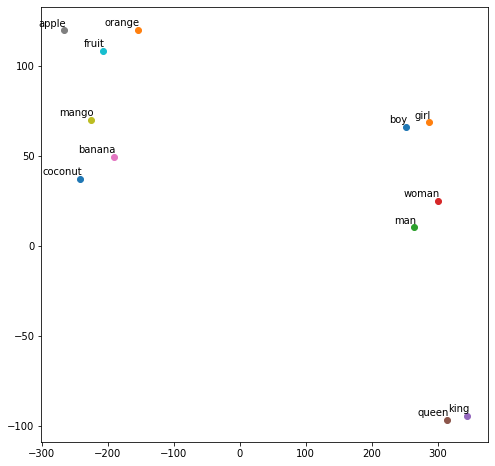

In [23]:
tsne_plot(glove_model)